Importing Libraries

In [15]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

Opening Book

In [16]:
# Function to read text from a file
def read_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

In [17]:
# Get the current working directory
base_path = os.getcwd()
file_path = os.path.join(base_path, '/content/theScam.txt')  # Remove the leading '/'

In [18]:
# Read the entire text from 'thescam.txt'
book_text = read_text(file_path)

Extracting Chapters from Book

In [19]:
# Function to extract text for each chapter
def extract_chapter_text(book_text, chapter_start, chapter_end):
    start_index = book_text.find(chapter_start)
    end_index = book_text.find(chapter_end, start_index + 1) if start_index != -1 else -1
    return book_text[start_index:end_index].strip() if end_index != -1 else book_text[start_index:].strip()


Name of Chapters

In [20]:
# Split the book text into chapters
chapters = [
    "The Scam Surfaces",
    "Banker, Broker, Sucker, Thief",
    "Creed of Greed",
    "A Greenhorn",
    "The Big Bull",
    "A Bloody War",
    "Harshad in the Net",
    "Wielding the Crowbar",
    "Stanchart and the Gang of Five",
    "Stanchart’s Money Trail",
    "Superbanker",
    "The Fairgrowth Story",
    "A Can of Worms",
    "The Buccaneer Bankers",
    "The One-eyed God",
    "The Witch-hunt",
    "Who Won, Who Lost, Who Got Away",
    "Harshad’s Return",
    "Justice Delayed",
    "Play It Again Sam",
    "Nothing Official About It",
    "Epilogue"
]

Creating DataFrame

In [21]:
# Create a DataFrame with chapter names and text
chapter_text = [extract_chapter_text(book_text, chapters[i], chapters[i + 1] if i + 1 < len(chapters) else "Epilogue") for i in range(len(chapters))]
df = pd.DataFrame({'Chapter': chapters, 'Text': chapter_text})

Calculating TF-IDF Vector

In [22]:
# Calculate TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Text'])

# Convert TF-IDF matrix to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=df['Chapter'])

Printing TF-IDF for Each Chapters

In [23]:
# Print the TF-IDF vectors for each chapter
print("TF-IDF Vectors for Each Chapter:")
print(tfidf_df)

TF-IDF Vectors for Each Chapter:
                                       00       000       005        01  \
Chapter                                                                   
The Scam Surfaces                0.000000  0.000000  0.000000  0.000000   
Banker, Broker, Sucker, Thief    0.000000  0.000000  0.000000  0.000000   
Creed of Greed                   0.000000  0.000000  0.000000  0.000000   
A Greenhorn                      0.000000  0.000000  0.000000  0.000000   
The Big Bull                     0.000000  0.000000  0.000000  0.000000   
A Bloody War                     0.000000  0.000000  0.000000  0.000000   
Harshad in the Net               0.000000  0.000000  0.000000  0.000000   
Wielding the Crowbar             0.000000  0.000000  0.000000  0.000000   
Stanchart and the Gang of Five   0.000000  0.000000  0.000000  0.000000   
Stanchart’s Money Trail          0.000000  0.000000  0.000000  0.000000   
Superbanker                      0.000000  0.000000  0.000000  0.00

Printing Tf-Idf Vector each word

In [24]:
# Print TF-IDF vectors
feature_names = vectorizer.get_feature_names_out()
for i, chapter in enumerate(chapters):
    print(f"\nTF-IDF Vectors for Chapter: {chapter}\n")
    chapter_vector = tfidf_matrix[i]
    feature_index = chapter_vector.nonzero()[1]
    tfidf_scores = zip(feature_index, [chapter_vector[0, x] for x in feature_index])
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        print(f"  {w}: {s:.4f}")

Streaming output truncated to the last 5000 lines.
  milking: 0.0006
  offload: 0.0001
  believing: 0.0004
  tempted: 0.0001
  pushed: 0.0005
  flared: 0.0001
  demonstrate: 0.0002
  intention: 0.0001
  ambuja: 0.0004
  blocks: 0.0001
  exactly: 0.0025
  stake: 0.0022
  jack: 0.0001
  midas: 0.0001
  390: 0.0001
  370: 0.0001
  tired: 0.0002
  130: 0.0007
  managements: 0.0004
  magazine: 0.0007
  formulate: 0.0001
  crowd: 0.0006
  stardom: 0.0006
  exploiting: 0.0004
  journal: 0.0001
  innocently: 0.0001
  unleashed: 0.0002
  hysteria: 0.0001
  mass: 0.0005
  mob: 0.0001
  mantra: 0.0001
  chanting: 0.0001
  drumbeats: 0.0001
  louder: 0.0001
  3896: 0.0001
  dropped: 0.0016
  wilted: 0.0001
  handedly: 0.0002
  upwards: 0.0004
  zipped: 0.0001
  125: 0.0007
  ballooned: 0.0001
  4467: 0.0002
  2491: 0.0001
  pulled: 0.0008
  collar: 0.0001
  crazy: 0.0001
  quoting: 0.0004
  dyechem: 0.0001
  amar: 0.0004
  ball: 0.0005
  karnataka: 0.0005
  dud: 0.0008
  implications: 0.0002
  dan

Cosine Similarity

In [25]:
# Compute cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a DataFrame for the cosine similarities
cosine_sim_df = pd.DataFrame(cosine_similarities, columns=df['Chapter'], index=df['Chapter'])

Similarity Table

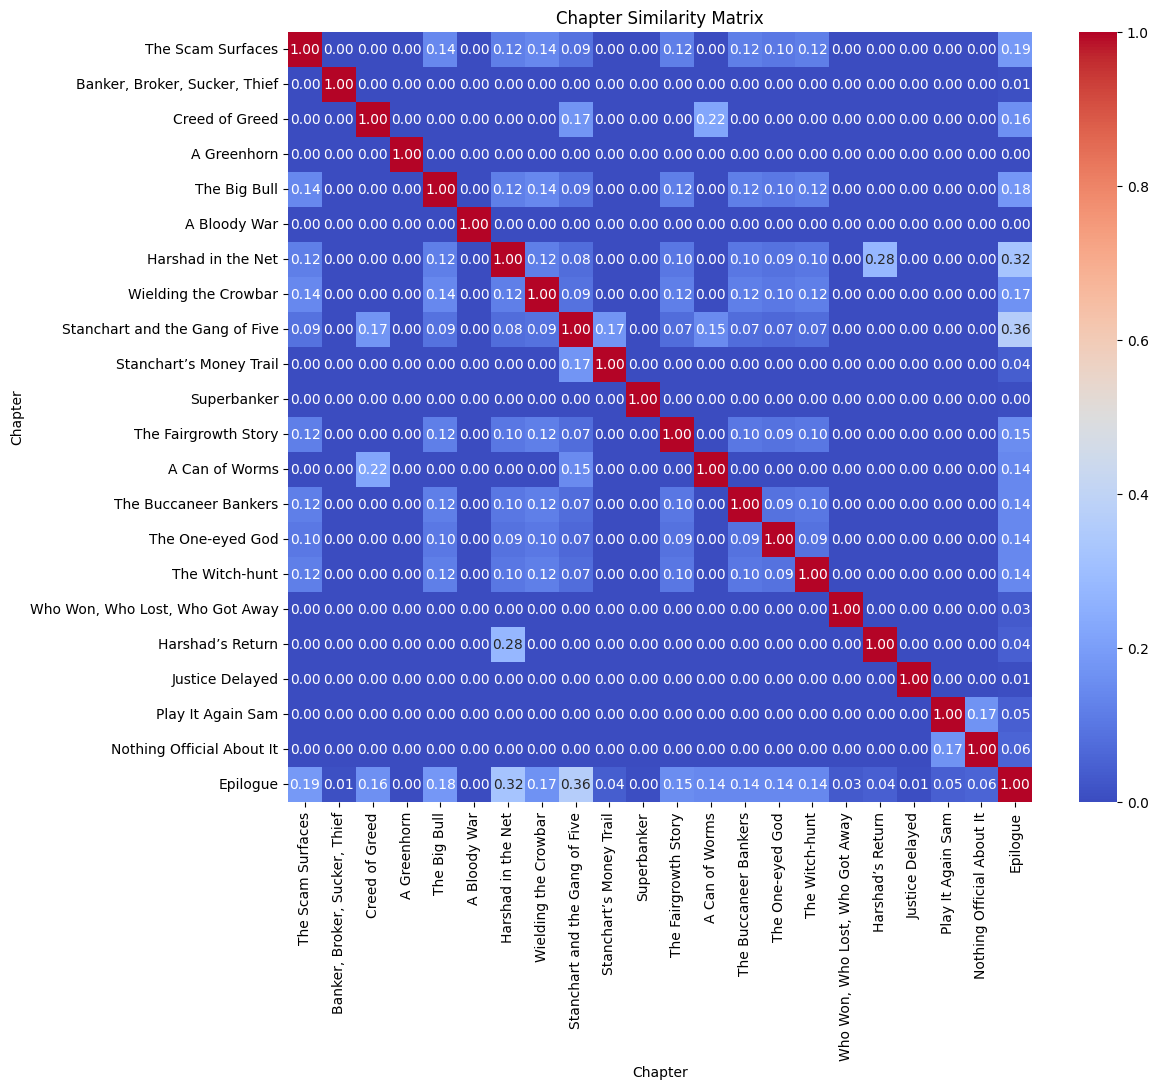

In [26]:
# Plot the similarity matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Chapter Similarity Matrix')
plt.show()

Most Similar Chapters

In [27]:
# Find the most similar chapters
most_similar_chapters = []

for chapter in chapters:
    max_sim = cosine_sim_df[chapter].drop(chapter).max()
    most_similar_chapter = cosine_sim_df[cosine_sim_df[chapter] == max_sim].index[0]
    most_similar_chapters.append((chapter, most_similar_chapter, max_sim))

# Print the most similar chapters
for similarity in most_similar_chapters:
    print(f"Most similar to '{similarity[0]}': '{similarity[1]}' with similarity score: {similarity[2]:.2f}")

Most similar to 'The Scam Surfaces': 'Epilogue' with similarity score: 0.19
Most similar to 'Banker, Broker, Sucker, Thief': 'Epilogue' with similarity score: 0.01
Most similar to 'Creed of Greed': 'A Can of Worms' with similarity score: 0.22
Most similar to 'A Greenhorn': 'Epilogue' with similarity score: 0.00
Most similar to 'The Big Bull': 'Epilogue' with similarity score: 0.18
Most similar to 'A Bloody War': 'Epilogue' with similarity score: 0.00
Most similar to 'Harshad in the Net': 'Epilogue' with similarity score: 0.32
Most similar to 'Wielding the Crowbar': 'Epilogue' with similarity score: 0.17
Most similar to 'Stanchart and the Gang of Five': 'Epilogue' with similarity score: 0.36
Most similar to 'Stanchart’s Money Trail': 'Stanchart and the Gang of Five' with similarity score: 0.17
Most similar to 'Superbanker': 'Epilogue' with similarity score: 0.00
Most similar to 'The Fairgrowth Story': 'Epilogue' with similarity score: 0.15
Most similar to 'A Can of Worms': 'Creed of Gre